In [8]:
import os
import re
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import timedelta
from math import ceil
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

# import tkinter as tk
# from tkinter import filedialog


homedir = r"\\ettin\Magill_Lab\Julien\Data\head-fixed\pycontrol"


# subject_ids = ['RE602','RE603','RE604']

# tasks = ['pavlovian_spontanous_reaching_march23',
#          ['reaching_go_spout_feb23',
#          'reaching_go_spout_nov22'],
#          'reaching_go_spout_incr_break2_nov22',
#          ['reaching_go_spout_bar_nov22',
#           'reaching_go_spout_bar_mar23']]

subject_ids = ['kms058', 'kms060', 'kms061', 'kms062', 'kms063', 'kms064']

tasks = ['reaching_go_spout_bar_nov22','reaching_go_spout_bar_mar23']

In [9]:

items = os.listdir(homedir)

folders = [os.path.join(homedir, item) for item in items if os.path.isdir(
    os.path.join(homedir, item))]

print(folders)


['\\\\ettin\\Magill_Lab\\Julien\\Data\\head-fixed\\pycontrol\\exp01', '\\\\ettin\\Magill_Lab\\Julien\\Data\\head-fixed\\pycontrol\\JC301LS', '\\\\ettin\\Magill_Lab\\Julien\\Data\\head-fixed\\pycontrol\\debug', '\\\\ettin\\Magill_Lab\\Julien\\Data\\head-fixed\\pycontrol\\pavlovian_nobar_nodelay', '\\\\ettin\\Magill_Lab\\Julien\\Data\\head-fixed\\pycontrol\\go_rewarding_aversive_2', '\\\\ettin\\Magill_Lab\\Julien\\Data\\head-fixed\\pycontrol\\go_rewarding_aversive', '\\\\ettin\\Magill_Lab\\Julien\\Data\\head-fixed\\pycontrol\\reward_calibration', '\\\\ettin\\Magill_Lab\\Julien\\Data\\head-fixed\\pycontrol\\train_go_pavlovian', '\\\\ettin\\Magill_Lab\\Julien\\Data\\head-fixed\\pycontrol\\pavlovian_2s_delay', '\\\\ettin\\Magill_Lab\\Julien\\Data\\head-fixed\\pycontrol\\water_calibration', '\\\\ettin\\Magill_Lab\\Julien\\Data\\head-fixed\\pycontrol\\ReachTest', '\\\\ettin\\Magill_Lab\\Julien\\Data\\head-fixed\\pycontrol\\check_light', '\\\\ettin\\Magill_Lab\\Julien\\Data\\head-fixed\\pycont

In [10]:
# folders = [r'\\ettin\Magill_Lab\Julien\Data\head-fixed\pycontrol\reaching_go_spout_bar_nov22']
filenames = []
folder_paths = []
for fld in folders:
    files = os.listdir(fld)

    # Filter out the files whose names don't match the regular expression pattern
    regex = re.compile('^(' + '|'.join(subject_ids) + ').+\.txt$')
    matching_files = [file for file in files if regex.match(file)]
    folders_ = [fld for file in files if regex.match(file)]

    if matching_files:
        filenames = filenames + matching_files
        folder_paths = folder_paths + folders_


df = pd.DataFrame({'folder': folder_paths, 'filename': filenames})


def get_date(text):
    match = re.search('\d{4}\-\d{2}\-\d{2}\-\d{6}', text)
    date_str = match.group(0)
    date_obj = datetime.strptime(date_str, '%Y-%m-%d-%H%M%S')
    return date_obj


df_['datetime'] = df['filename'].apply(get_date)

df = df.sort_values(by='datetime', ascending=True)
df.reset_index(drop=True, inplace=True)
print(df)


                                                folder  \
0    \\ettin\Magill_Lab\Julien\Data\head-fixed\pyco...   
1    \\ettin\Magill_Lab\Julien\Data\head-fixed\pyco...   
2    \\ettin\Magill_Lab\Julien\Data\head-fixed\pyco...   
3    \\ettin\Magill_Lab\Julien\Data\head-fixed\pyco...   
4    \\ettin\Magill_Lab\Julien\Data\head-fixed\pyco...   
..                                                 ...   
287  \\ettin\Magill_Lab\Julien\Data\head-fixed\pyco...   
288  \\ettin\Magill_Lab\Julien\Data\head-fixed\pyco...   
289  \\ettin\Magill_Lab\Julien\Data\head-fixed\pyco...   
290  \\ettin\Magill_Lab\Julien\Data\head-fixed\pyco...   
291  \\ettin\Magill_Lab\Julien\Data\head-fixed\pyco...   

                         filename            datetime  
0    kms058-2023-01-26-100537.txt 2023-01-26 10:05:37  
1    kms058-2023-01-26-100832.txt 2023-01-26 10:08:32  
2    kms058-2023-01-26-103650.txt 2023-01-26 10:36:50  
3    kms058-2023-01-26-104822.txt 2023-01-26 10:48:22  
4    kms060-2023-01-26-

In [11]:
df.loc[:,'filepath'] = [os.path.join(folder, filename) for folder, filename in zip(df['folder'],df['filename'])]

In [12]:
# m1 = re.match('^#(\d+):\s[a-zA-Z_\s]+(\d+)','#158: init by spout 120, bar_off 0, btn 2, free 0, miss 36, OOXOOOOOOO')
# print(m1.group(0))
# print(m1.group(1))
# print(m1.group(2))

# print(float(m1.group(2))/float(m1.group(1)))


In [13]:
# add columns

df.loc[0,'subject_id'] = 'kms000'
df.loc[0,'task_name'] = 'task'
df.loc[0,'start_date'] = datetime.now()
df.loc[0,'start_tod'] = datetime.now().time()
df.loc[0,'success_rate'] = np.nan

var_name = 'short_break_ms'

for index, row in df.iterrows():

    with open(os.path.join(df.loc[index,'folder'], df.loc[index,'filename']), 'r') as f:
        all_lines = [line.strip() for line in f.readlines() if line.strip()]

    v_lines = [line for line in all_lines if bool(re.match('^V\s\d+\s', line))]

    m = None
    i = 0
    while m is None:
        m = re.match('^I\sSubject\sID\s\:\s(.+)', all_lines[i])
        i += 1
    subject_id = m.group(1)
    # print(f"{subject_id}")

    m = None
    i = 0
    while m is None:
        m = re.match('^I\sTask\sname\s\:\s(.+)', all_lines[i])
        i += 1
    task_name = m.group(1)
    # print(f"{task_name}")

    m = None
    i = 0
    while m is None:
        m = re.match('^I\sStart\sdate\s\:\s(.+)', all_lines[i])
        i += 1
    start_date = m.group(1)
    # print(f"{start_date}")

    start_datetime = datetime.strptime(start_date, '%Y/%m/%d %H:%M:%S')

    df.at[index,'subject_id'] = subject_id
    df.at[index, 'task_name'] = task_name
    df.at[index, 'start_date'] = start_datetime

    df.at[index, 'start_tod'] = start_datetime.time()
    # flag_notyet = True
    # for string in v_lines:
    #     if flag_notyet:
    #         if not bool(re.match('^V\s0\s', string)):
    #             flag_notyet = False
    #             # print('')

    #     m = re.search('V\s(\d+)\s([\w\d_]+)\s(.+)', string)
        
    #     if m is not None and m.group(2) == var_name:
            
    #         list_v.append({'datetime': start_datetime + timedelta(milliseconds= int(m.group(1))), 
    #             'value': eval(m.group(3))})

    i = -1
    m1 = None
    while m1 is None and i >= -1 * len(all_lines):
        m1 = re.match('^#(\d+):\s[a-zA-Z_\s]+(\d+)', all_lines[i])
        # '#158: init by spout 120, bar_off 0, btn 2, free 0, miss 36, OOXOOOOOOO'

        if m1 is not None:
            df.at[index, 'success_rate'] =  float(m1.group(2))/float(m1.group(1))

        i -= 1


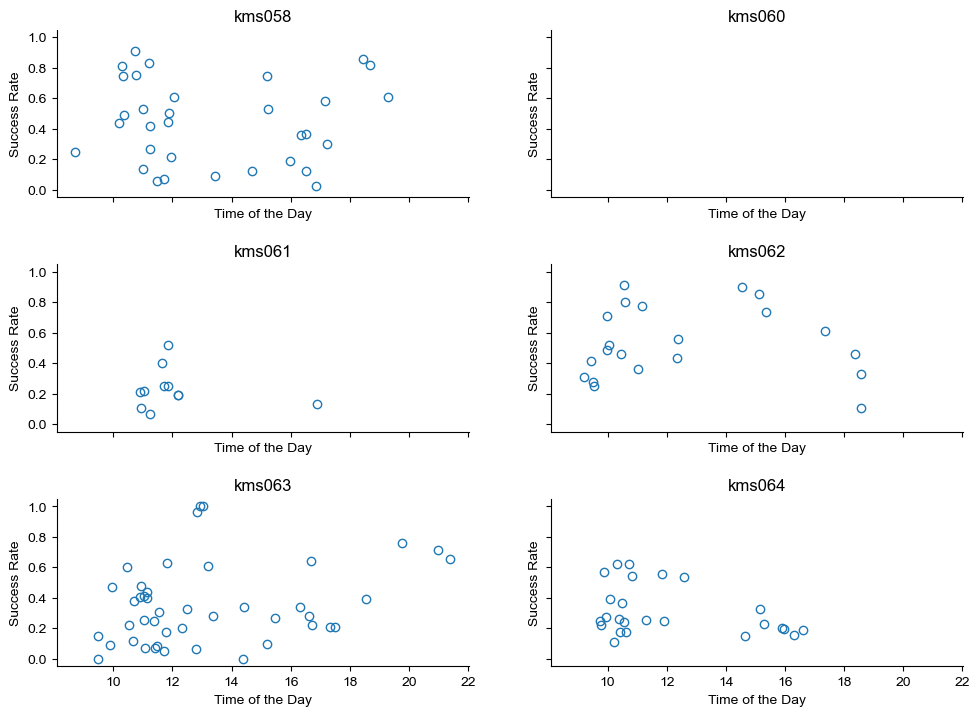

In [33]:

cm = 1/2.54  # centimeters in inches
A4 = (29.7*cm, 21*cm)
fig, ax = plt.subplots(ceil(len(subject_ids)/2), 2,
                       sharex=True, sharey=True, figsize=A4)
plt.rcParams['font.family'] = ['Arial']
ax_flat = ax.ravel()

for sbj_idx, sbj in enumerate(subject_ids):

    df_ = df.loc[df.subject_id == sbj,:]

    ax_flat[sbj_idx].plot([t.hour + t.minute / 60.0 for t in df_.start_tod], df_.success_rate, 'o', markerfacecolor='None')

    ax_flat[sbj_idx].set_xlabel('Time of the Day')
    ax_flat[sbj_idx].set_ylabel('Success Rate')
    ax_flat[sbj_idx].spines['top'].set_visible(False)
    ax_flat[sbj_idx].spines['right'].set_visible(False)
    ax_flat[sbj_idx].set_title(sbj)

plt.subplots_adjust(hspace=0.4)

plt.show()



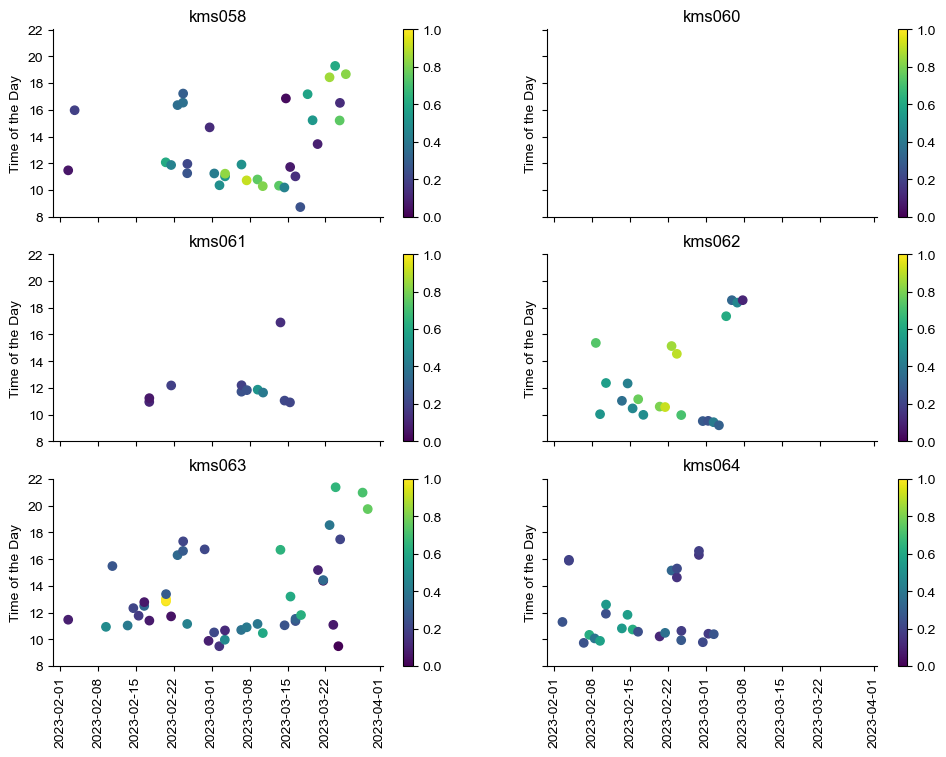

In [35]:

plt.rcParams['font.family'] = ['Arial']

cm = 1/2.54  # centimeters in inches
A4 = (29.7*cm, 21*cm)
fig, ax = plt.subplots(ceil(len(subject_ids)/2), 2, sharex=True, sharey=True, figsize=A4)

ax_flat = ax.ravel()

for sbj_idx, sbj in enumerate(subject_ids):

    df_ = df.loc[df.subject_id == sbj, :]

    sc = ax_flat[sbj_idx].scatter(df_.start_date,   [
                             t.hour + t.minute / 60.0 for t in df_.start_tod], c=df_.success_rate, cmap='viridis', vmin=0, vmax=1)
    # ax_flat[sbj_idx].set_xlabel('Date')
    ax_flat[sbj_idx].set_ylabel('Time of the Day')



    # Add a title and legend
    ax_flat[sbj_idx].set_title(sbj)
    # ax_flat[sbj_idx].legend(['Intervals'], loc='upper left')
    # ax2.legend(['Session success rates'], loc='upper right')

    ax_flat[sbj_idx].spines['top'].set_visible(False)
    ax_flat[sbj_idx].spines['right'].set_visible(False)

    for label in ax_flat[sbj_idx].get_xticklabels():
        label.set_rotation(90)

    plt.colorbar(sc)

ax[0,0].set_yticks([8, 10, 12, 14, 16, 18, 20, 22])
plt.subplots_adjust(hspace=0.2)
plt.show()

